In [1]:
import sys
import matplotlib.pyplot as plt

sys.path.append("../")

from src.util import *
from src.greeks import *

## Example 19.1

page 423, delta is 0.522

In [2]:
delta_euro_call(tc.tensor([0.2, 49, 50, 0.05, 0.3846]))

tensor(0.5216)

## Example 19.2

page 428, theta is -4.31

In [3]:
theta_euro_call(tc.tensor([0.2, 49, 50, 0.05, 0.3846]))

tensor(-4.3054)

## Example 19.4

page 432, gamma is 0.066

In [4]:
gamma_euro(tc.tensor([0.2, 49, 50, 0.05, 0.3846]))

tensor(0.0655)

## Example 19.6

page 436, vega is 12.1

In [16]:
vega_euro(tc.tensor([0.2, 49, 50, 0.05, 0.3846]))

tensor(12.1052)

# Greeks

In [5]:
def simulate_greek_depends_on_S(params, greek = delta_euro_call, n_simulations = 100):
    param_copy = params.repeat(n_simulations, 1)
    param_copy[:, 1] = tc.arange(n_simulations) + param_copy[:, 1] # param_copy[:, 1] are Stock price S. This increases stock price by 1 at each time
    greek = [greek(param_copy[i]) for i in range(len(param_copy))]
    return greek

## Delta on call or put options

In [6]:
# params: sigma = 0.25, S0, K = 50, q = 0, T = 2

delta1 = simulate_greek_depends_on_S(tc.tensor([0.25, 0, 50, 0, 2]))

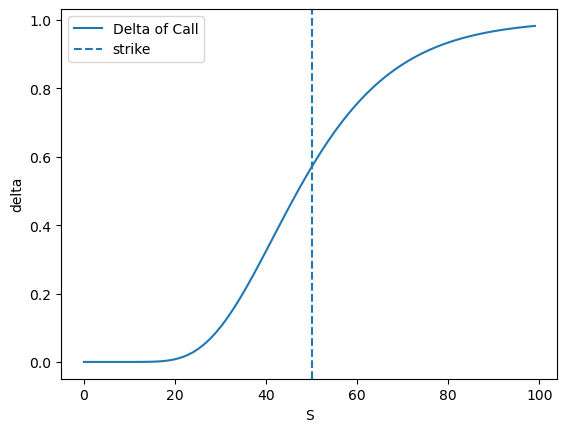

In [7]:
plt.plot(delta1, label = "Delta of Call")
plt.xlabel("S")
plt.ylabel("delta")
plt.axvline(x = 50, linestyle = "dashed", label = "strike")
plt.legend()

In [8]:
delta2 = simulate_greek_depends_on_S(tc.tensor([0.25, 0, 50, 0, 2]), greek = delta_euro_put)

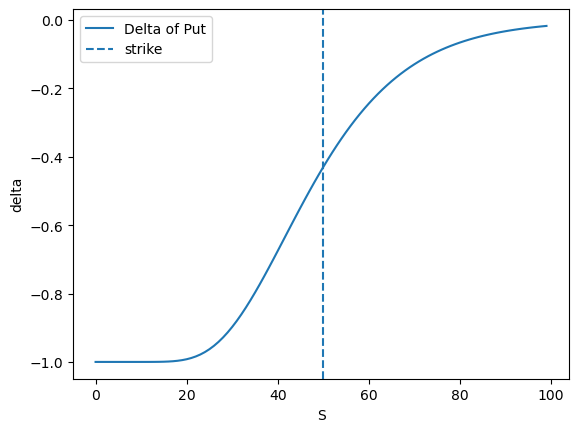

In [9]:
plt.plot(delta2, label = "Delta of Put")
plt.xlabel("S")
plt.ylabel("delta")
plt.axvline(x = 50, linestyle = "dashed", label = "strike")
plt.legend()

## Gamma on call & put

In [10]:
gamma1 = simulate_greek_depends_on_S(tc.tensor([0.25, 0, 50, 0, 2]), greek = gamma_euro,
                                    n_simulations=200)

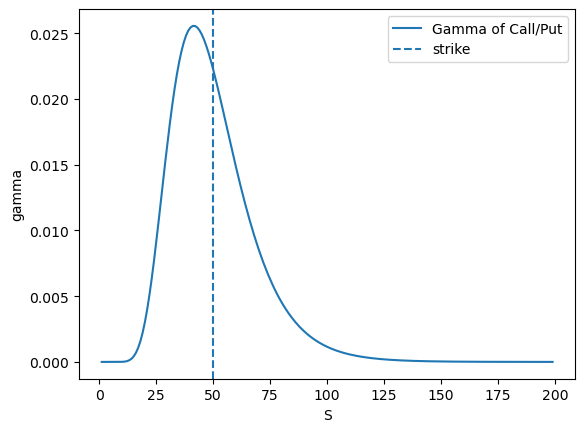

In [11]:
plt.plot(gamma1, label = "Gamma of Call/Put")
plt.xlabel("S")
plt.ylabel("gamma")
plt.axvline(x = 50, linestyle = "dashed", label = "strike")
plt.legend()

## Vega on call & put

In [14]:
vega1 = simulate_greek_depends_on_S(tc.tensor([0.25, 0, 50, 0, 2]), greek = vega_euro,
                                    n_simulations=200)

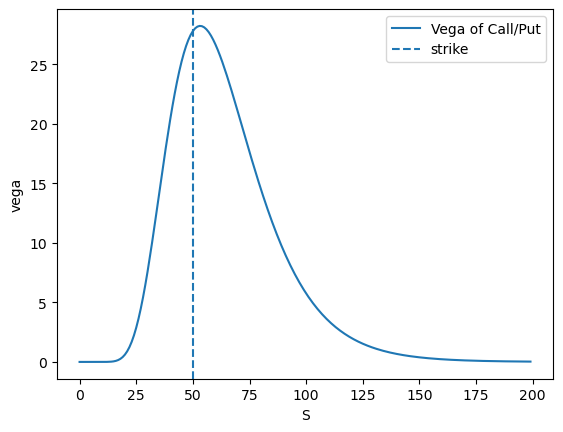

In [15]:
plt.plot(vega1, label = "Vega of Call/Put")
plt.xlabel("S")
plt.ylabel("vega")
plt.axvline(x = 50, linestyle = "dashed", label = "strike")
plt.legend()